## Chapter4.2 機械学習の導入

必要なライブラリをインポートします

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

scikit-learnでデータセットを作成

In [2]:
from sklearn.datasets import make_blobs

X_dataset, y_dataset = make_blobs(centers=[[-0.3, 0.3], [0.3, -0.3]],
                                  cluster_std=0.2,
                                  n_samples=20,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

データセットをプロットします

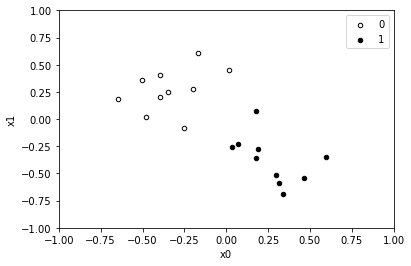

In [3]:
def plot_dataset():
    fig, ax = plt.subplots()
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color,
               edgecolor='black', linewidth='1',
               xlim=(-1, 1), ylim=(-1, 1))


plot_dataset()

補助線を引いて識別境界を作ります

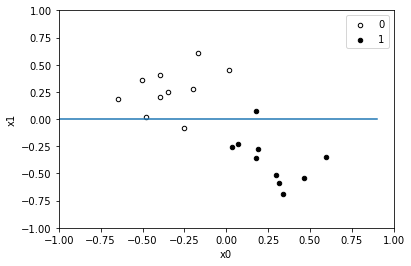

In [4]:
def plot_boundary(m, n):
    x = np.arange(-1.0, 1.0, 0.1)
    y = eval('%f*x' % (-m / (n + 1e-6)))
    plt.plot(x, y)


plot_dataset()
plot_boundary(m=0.0, n=1.0)

In [5]:
m = 0.0              # 初期値
n = 1.0              # 初期値
c = 0.0              # 固定
learning_rate = 0.1  # 学習率（固定）


def rotate(direction):
    global m, n
    if direction == 1:  # 反時計回り
        m += learning_rate * -1.0
        n += learning_rate * -1.0
    else:               # 時計回り
        m += learning_rate * 1.0
        n += learning_rate * 1.0


def predict(x0, x1):
    global m, n
    if m * x0 + n * x1 + c > 0.0:
        y = 0
    else:
        y = 1
    return y

学習を開始します

rotate -1
(-0.1, 0.9)


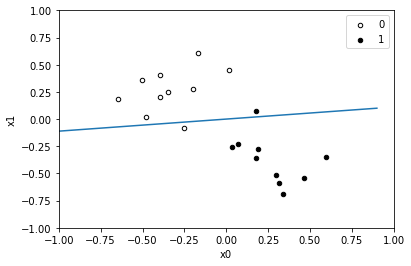

rotate -1
(-0.2, 0.8)


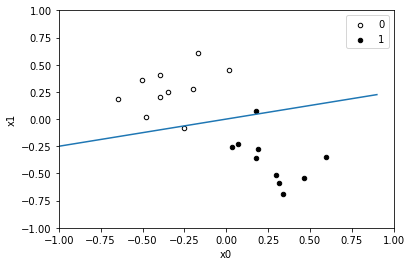

Training completed!
(-0.2, 0.8)


In [6]:
def plot_all():
    plot_dataset()
    plot_boundary(m=m, n=n)
    plt.show()


def train():
    for i, (x0, x1, y) in dataset.iterrows():
        pred = predict(x0, x1)  # 現在の識別境界で識別
        if pred != y:        # 不正解なのでm,nを更新
            if (y == 1 and x0 > 0) or (y == 0 and x0 < 0):  # 反時計回り
                rotate(1)
                print('rotate -1')
            else:
                rotate(0)
                print('rotate 1')

            print(m, n)
            plot_all()
        else:
            pass             # 合っているので何もしない

train()
print('Training completed!')
print(m, n)

もう１エポック学習

rotate -1
(-0.30000000000000004, 0.7000000000000001)


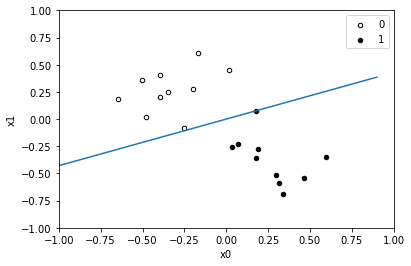

Training completed!
(-0.30000000000000004, 0.7000000000000001)


In [7]:
train()
print('Training completed!')
print(m, n)

学習率を上げる

rotate -1
(-1.0, 0.0)


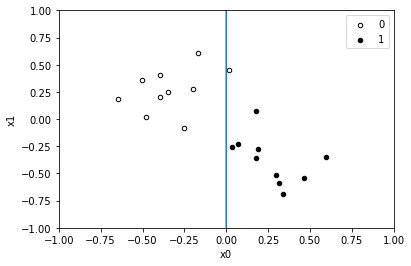

rotate 1
(0.0, 1.0)


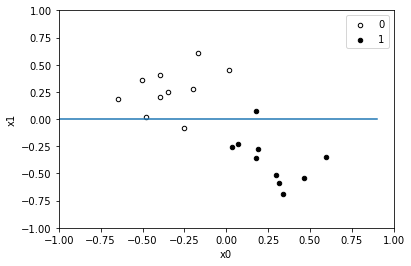

rotate -1
(-1.0, 0.0)


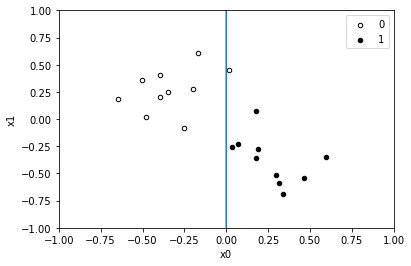

rotate 1
(0.0, 1.0)


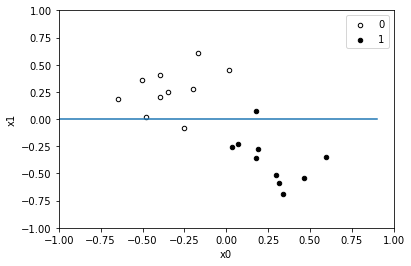

rotate -1
(-1.0, 0.0)


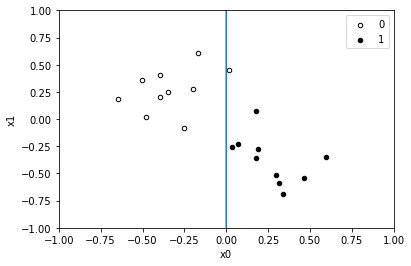

rotate 1
(0.0, 1.0)


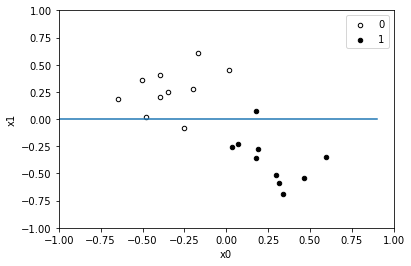

In [8]:
m = 0.0      # 初期値
n = 1.0      # 初期値
c = 0.0              # 固定
learning_rate = 1.0  # 学習率（固定）0.1 -> 1.0

# 1エポック目
train()
# 2エポック目
train()
# 3エポック目
train()
